In [1]:
%reset -f
import sys
print("Python version")
print(sys.version)

Python version
3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Coingecko api
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [19]:
patients_df = pd.read_json('markets.json')
patients_df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,48469.00,911960834342,1,1.018633e+12,27871028253,49640.00,...,2.100000e+07,2.100000e+07,64805.00,-25.44213,2021-04-14T11:54:46.763Z,67.810000,7.115459e+04,2013-07-06T00:00:00.000Z,None,2021-08-29T14:53:20.492Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,3194.59,375056777315,2,NaN,14394357023,3289.94,...,NaN,NaN,4356.99,-26.88647,2021-05-12T14:41:48.623Z,0.432979,7.356287e+05,2015-10-20T00:00:00.000Z,"{'times': 87.11417761148837, 'currency': 'btc'...",2021-08-29T14:53:23.478Z
2,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,2.87,92111154323,3,1.292631e+11,4538267013,2.92,...,4.500000e+10,4.500000e+10,2.95,-2.88505,2021-08-23T23:04:47.623Z,0.019253,1.478849e+04,2020-03-13T02:22:55.044Z,None,2021-08-29T14:53:12.873Z
3,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,484.67,74921385977,4,8.267855e+10,1536402167,495.15,...,1.705337e+08,1.705337e+08,686.31,-29.56388,2021-05-10T07:24:17.097Z,0.039818,1.213952e+06,2017-10-19T00:00:00.000Z,None,2021-08-29T14:52:40.242Z
4,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.00,65976210590,5,NaN,52230820308,1.01,...,6.584148e+10,NaN,1.32,-24.26499,2018-07-24T00:00:00.000Z,0.572521,7.502351e+01,2015-03-02T00:00:00.000Z,None,2021-08-29T14:06:08.638Z


In [4]:
lista_tokens = list(pd.DataFrame(cg.get_exchanges_list())[["id"]]["id"])

In [5]:
import time
import datetime

def edit_prices_dict(d): 
    df=pd.DataFrame(d)
    #Saving dates
    dates=df['prices'].map(lambda x: x[0])  
    #Filtering the values without dates
    df=df.applymap(lambda x: x[1])
    df['dates']=dates 
    df["dates"] = pd.to_datetime(df['dates'], unit='ms')
    df.index = df["dates"]
    df=df[['prices','total_volumes','market_caps']]
    return df

In [10]:
response=cg.get_coin_market_chart_by_id(id = 'huobi', vs_currency = "usd", days = 200)

ValueError: {'error': 'Could not find coin with the given id'}

In [5]:
#dd/mm/yyyy
from_date="01/01/2020"
to_date="29/08/2021"
from_unix = time.mktime(datetime.datetime.strptime(from_date, "%d/%m/%Y").timetuple())
to_unix = time.mktime(datetime.datetime.strptime(to_date, "%d/%m/%Y").timetuple())

token = "bitcoin"; vs_currency = "usd"

response=cg.get_coin_market_chart_range_by_id(id = token, vs_currency = vs_currency, from_timestamp = from_unix, to_timestamp = to_unix)

In [6]:
df = edit_prices_dict(response)
print(df.shape)
df.tail()

(606, 3)


,prices,total_volumes,market_caps
dates,,,
2021-08-24,49518.577488,3.580026e+10,9.307292e+11
2021-08-25,47940.607915,3.838715e+10,9.024895e+11
2021-08-26,49002.703766,3.351733e+10,9.213282e+11
2021-08-27,47229.070651,3.377486e+10,8.878321e+11
2021-08-28,49083.103306,3.460787e+10,9.229698e+11


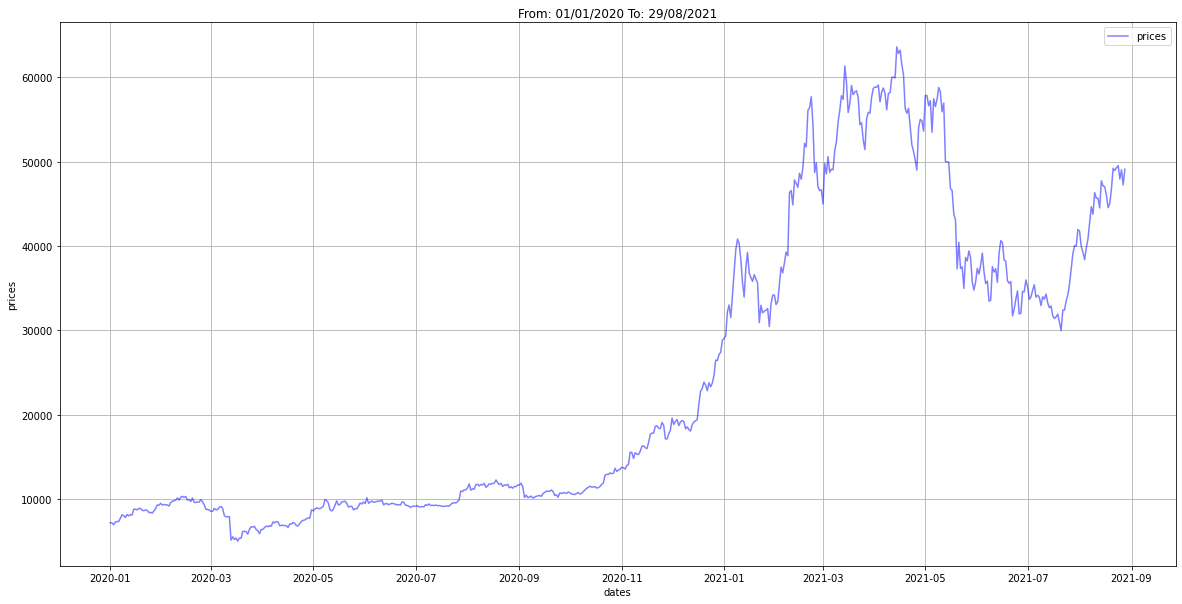

In [7]:
fig=plt.figure(figsize=(20, 10))
plt.plot(df['prices'], 'b', label = 'prices', alpha = 0.5)
plt.title('From: ' + from_date + ' To: ' + to_date)
plt.xlabel('dates')
plt.ylabel('prices')
plt.legend()
plt.grid(True)

In [8]:
lag_days = 3
df["y"] = df["prices"].shift(-1 * lag_days)
df.tail(10)

,prices,total_volumes,market_caps,y
dates,,,,
2021-08-19,45015.465546,3.466900e+10,8.471430e+11,48933.689151
2021-08-20,46745.034623,3.843481e+10,8.676507e+11,49250.544870
2021-08-21,49195.878602,3.649709e+10,9.230134e+11,49518.577488
2021-08-22,48933.689151,4.214773e+10,9.207502e+11,47940.607915
2021-08-23,49250.544870,2.711018e+10,9.256301e+11,49002.703766
2021-08-24,49518.577488,3.580026e+10,9.307292e+11,47229.070651
2021-08-25,47940.607915,3.838715e+10,9.024895e+11,49083.103306
2021-08-26,49002.703766,3.351733e+10,9.213282e+11,NaN
2021-08-27,47229.070651,3.377486e+10,8.878321e+11,NaN


In [9]:
#https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb
# MovingAverage
#values_ma = [5,15,30]
#
#for i in values_ma:
#    df["ma_close_" + str(i)] = df["close"].rolling(window=i).mean()
#    df["ma_volume_" + str(i)] = df["volume"].rolling(window=i).mean()

# ExponentialMovingWindow
values_ema = [5,15,30]

for i in values_ema:
    df["ema_" + str(i)] = df["prices"].ewm(span = i, adjust = False).mean()
    
# RSI https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
values_rsi = [7,14,21]
close = df['prices']

# Get the difference in price from previous step
delta = close.diff()

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

for i in values_rsi:
    # Calculate the EWMA
    #roll_up1 = up.ewm(span=i).mean()
    #roll_down1 = down.abs().ewm(span=i).mean()

    ## Calculate the RSI based on EWMA
    #RS1 = roll_up1 / roll_down1
    #RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(i).mean()
    roll_down2 = down.abs().rolling(i).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))
    
    #df["rsi_ewma_" + str(i)] = RSI1.values
    df["rsi_sma_" + str(i)]  = RSI2.values
    
# BollingerBand
values_bollinger = [5,10,20]
for i in values_bollinger:
    df['bollinger_upper_' + str(i)] = df['prices'].rolling(window=i).mean() + (df['prices'].rolling(window=i).std()  * 2)
    df['bollinger_lower_' + str(i)] = df['prices'].rolling(window=i).mean() - (df['prices'].rolling(window=i).std()  * 2)

# Rate of change
values_rc = [5,15,30]
for i in values_rc:
    df["rc_" + str(i)] = df["prices"].pct_change(periods = i)
    
# Stochastic Oscillators
#values_so = [5,15,30]
#for i in values_so:
#    lowest = df["low"].rolling(window = i).min()
#    high = df["high"].rolling(window = i).max()
#    df["so_" + str(i)] = ((df['close'] -lowest)/(high - lowest))*100
#    df["so_%D" + str(i)] = df["so_" + str(i)].rolling(window = i).mean()

In [10]:
# Get feature from dates
df['month'] = df.index.month.astype(str)
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek.astype(str)
df['dayofyear'] = df.index.dayofyear

In [11]:
df.tail()

,prices,total_volumes,market_caps,y,ema_5,ema_15,ema_30,rsi_sma_7,rsi_sma_14,rsi_sma_21,...,bollinger_lower_10,bollinger_upper_20,bollinger_lower_20,rc_5,rc_15,rc_30,month,day,weekday,dayofyear
dates,,,,,,,,,,,,,,,,,,,,,
2021-08-24,49518.577488,3.580026e+10,9.307292e+11,47229.070651,48627.201280,46551.217432,43868.328902,74.885223,61.660297,70.986623,...,43689.602041,51075.418629,40418.002827,0.100035,0.131770,0.447336,8,24,1,236
2021-08-25,47940.607915,3.838715e+10,9.024895e+11,49083.103306,48398.336825,46724.891243,44131.056581,74.032787,57.847807,69.095928,...,43760.448277,50753.541002,41558.782788,0.025576,0.035188,0.352111,8,25,2,237
2021-08-26,49002.703766,3.351733e+10,9.213282e+11,NaN,48599.792472,47009.617808,44445.356399,76.000711,60.663848,68.694822,...,43840.966897,50584.393102,42545.662871,-0.003927,0.073690,0.314383,8,26,3,238
2021-08-27,47229.070651,3.377486e+10,8.878321e+11,NaN,48142.885198,47037.049413,44624.950867,53.138355,58.372169,62.584728,...,44111.154331,50400.364264,43172.385056,-0.034835,0.034544,0.208628,8,27,4,239
2021-08-28,49083.103306,3.460787e+10,9.229698e+11,NaN,48456.291234,47292.806150,44912.573605,49.207461,54.565240,62.403379,...,45280.643819,50613.882911,43402.418980,-0.003400,0.103110,0.226121,8,28,5,240


In [12]:
df_modelo = df.drop(df.tail(3).index) # drop last n rows quitamos el día actual
df_modelo.tail(1)

,prices,total_volumes,market_caps,y,ema_5,ema_15,ema_30,rsi_sma_7,rsi_sma_14,rsi_sma_21,...,bollinger_lower_10,bollinger_upper_20,bollinger_lower_20,rc_5,rc_15,rc_30,month,day,weekday,dayofyear
dates,,,,,,,,,,,,,,,,,,,,,
2021-08-25,47940.607915,3.838715e+10,9.024895e+11,49083.103306,48398.336825,46724.891243,44131.056581,74.032787,57.847807,69.095928,...,43760.448277,50753.541002,41558.782788,0.025576,0.035188,0.352111,8,25,2,237


In [13]:
df_probar = df.tail(3)
df_probar.head()

,prices,total_volumes,market_caps,y,ema_5,ema_15,ema_30,rsi_sma_7,rsi_sma_14,rsi_sma_21,...,bollinger_lower_10,bollinger_upper_20,bollinger_lower_20,rc_5,rc_15,rc_30,month,day,weekday,dayofyear
dates,,,,,,,,,,,,,,,,,,,,,
2021-08-26,49002.703766,3.351733e+10,9.213282e+11,NaN,48599.792472,47009.617808,44445.356399,76.000711,60.663848,68.694822,...,43840.966897,50584.393102,42545.662871,-0.003927,0.073690,0.314383,8,26,3,238
2021-08-27,47229.070651,3.377486e+10,8.878321e+11,NaN,48142.885198,47037.049413,44624.950867,53.138355,58.372169,62.584728,...,44111.154331,50400.364264,43172.385056,-0.034835,0.034544,0.208628,8,27,4,239
2021-08-28,49083.103306,3.460787e+10,9.229698e+11,NaN,48456.291234,47292.806150,44912.573605,49.207461,54.565240,62.403379,...,45280.643819,50613.882911,43402.418980,-0.003400,0.103110,0.226121,8,28,5,240


In [15]:
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = df_modelo,
             target = 'y', feature_interaction=True,
             transform_target_method = "yeo-johnson",
             remove_multicollinearity = True, multicollinearity_threshold = 0.9,
             create_clusters=True)

,Description,Value
0,session_id,3263
1,Target,y
2,Original Data,"(603, 23)"
3,Missing Values,True
4,Numeric Features,20
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(422, 46)"


In [16]:
# return best model
best = compare_models(sort = 'RMSE', exclude = ["ridge","huber"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,972.9702,2702108.5537,1622.8484,0.9907,0.0483,0.0354,0.1190
rf,Random Forest Regressor,1002.5596,3117283.6465,1717.0823,0.9893,0.0528,0.0372,0.1440
gbr,Gradient Boosting Regressor,1084.7952,3152685.7642,1730.0037,0.9892,0.0604,0.0441,0.0380
lightgbm,Light Gradient Boosting Machine,1094.7618,3173719.5277,1753.5710,0.9892,0.0566,0.0425,0.0220
catboost,CatBoost Regressor,1165.6799,3536415.0597,1837.0467,0.9877,0.0685,0.0502,2.1960
ada,AdaBoost Regressor,1507.0565,4686699.1036,2134.3356,0.9840,0.1055,0.0800,0.0250
omp,Orthogonal Matching Pursuit,1427.5484,4690406.7471,2143.8812,0.9839,0.0783,0.0597,0.0050
lasso,Lasso Regression,1465.1444,4699513.4500,2149.1939,0.9838,0.0841,0.0649,0.1750
llar,Lasso Least Angle Regression,1485.2105,4799269.3617,2177.5262,0.9834,0.0910,0.0686,0.0060
en,Elastic Net,1457.9001,5014117.3125,2210.9824,0.9828,0.0758,0.0586,0.0100


In [17]:
# tune hyperparameters with increased n_iter
tuned_model = tune_model(best, optimize= "RMSE", n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1014.6088,2520474.2315,1587.6001,0.9922,0.0510,0.0390
1,1019.4056,3465396.5262,1861.5576,0.9864,0.0656,0.0435
2,1044.5450,3174370.3422,1781.6763,0.9877,0.0520,0.0382
3,1441.1202,5773751.6341,2402.8632,0.9828,0.0589,0.0448
4,1289.4996,3286431.0489,1812.8516,0.9891,0.0649,0.0487
5,1204.9192,3830905.5805,1957.2699,0.9857,0.0540,0.0438
6,811.9099,1876364.0342,1369.8044,0.9928,0.0646,0.0400
7,1182.2251,3647766.6913,1909.9127,0.9875,0.0553,0.0429
8,748.3490,1754903.2846,1324.7276,0.9951,0.0407,0.0299
9,745.3008,1421020.0265,1192.0654,0.9948,0.0425,0.0343


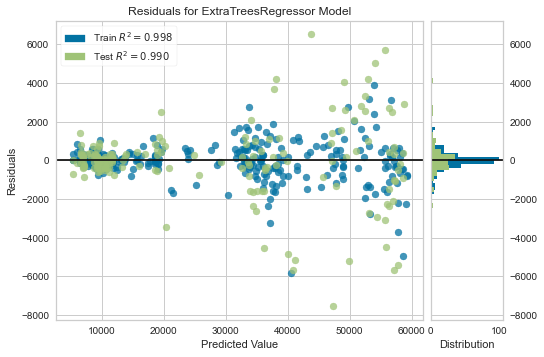

In [18]:
# plotting a model
plot_model(tuned_model, 'residuals')

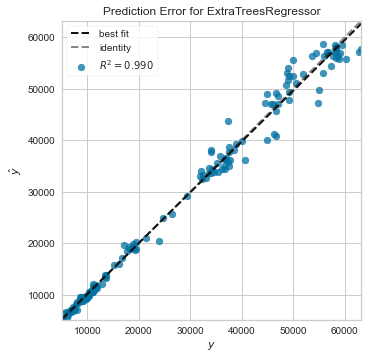

In [19]:
# plotting a model
plot_model(tuned_model, 'error')

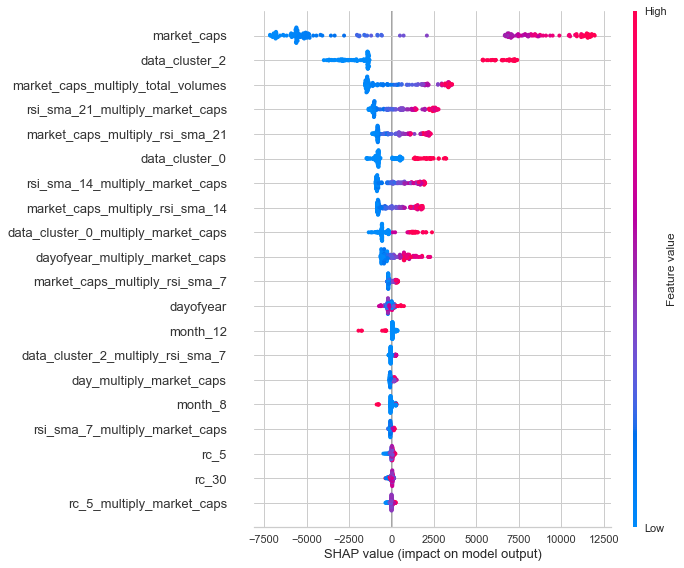

In [20]:
# interpreting model
interpret_model(tuned_model)

In [31]:
# finalize a model
final_model = finalize_model(tuned_model)

In [32]:
# generate predictions on unseen data
predictions = predict_model(final_model, data = df_probar)

In [34]:
predictions[["prices","Label"]]

,prices,Label
dates,,
2021-08-26,49002.703766,47097.775223
2021-08-27,47229.070651,46115.662309
2021-08-28,49083.103306,46701.525618
